<h1>CW1 Big Data 1907240

imports

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
import tensorboard
import datetime
from skimage.feature import hog

Load images and labels

In [65]:
trn_images = np.load('trnImage.npy')
trn_labels = np.load('trnLabel.npy')
trn_labelsfine = np.load('trnLabel_fine.npy')
trn_labelscoarse = np.load('trnLabel_coarse.npy')

tst_images = np.load('tstImage.npy')
tst_labels = np.load('tstLabel.npy')
tst_labelsfine = np.load('tstLabel_fine.npy')
tst_labelscoarse = np.load('tstLabel_coarse.npy')

#load the label names from the csv file
labelnamesfine = np.genfromtxt('fine_labels.csv', delimiter=',', 
                               dtype=None, encoding=None)
labelnamescoarse = np.genfromtxt('coarse_labels.csv', delimiter=',', 
                                 dtype=None, encoding=None)


In [66]:
print(len(labelnamescoarse))

20


try load a single image and print its fine and coarse labels

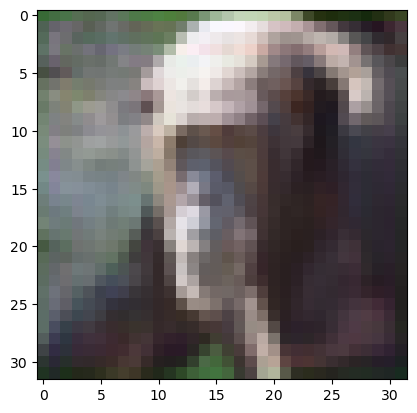

fine label: chimpanzee
coarse label: large omnivores and herbivores


In [67]:
image_index = 34 # pick a specific image
image = trn_images[:, :, :, image_index]
#display the image
plt.imshow(image, cmap='gray')
plt.show()
#get the images fine label index
labelfine = trn_labelsfine[image_index]
#get the images coarse label index
labelcoarse = trn_labelscoarse[image_index]
#get the images fine label name
labelfinename = labelnamesfine[labelfine]
#get the images coarse label name
labelcoarsename = labelnamescoarse[labelcoarse]
print('fine label:',labelfinename)
print('coarse label:',labelcoarsename)


In [68]:
print (trn_images.shape)

(32, 32, 3, 50000)


In [69]:
#transpose the data to be in the correct format (32, 32, 3, 50000) to (50000, 32, 32, 3)
trn_images = trn_images.transpose(3, 0, 1, 2)

# flatten the data
trn_images = trn_images.reshape(50000, 3072)

#normalise the data
trn_images = trn_images / 255.0

print(trn_images.shape)
print(trn_labelscoarse.shape)

#reshape to be in the correct format for the model
trn_images = trn_images.reshape(50000, 32, 32, 3)

# clear the previous model
tf.keras.backend.clear_session()

# build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax')) 

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

(50000, 3072)
(50000,)


In [70]:
# train the model
model.fit(trn_images, trn_labelscoarse, epochs=20, batch_size=64) # increased epochs

Epoch 1/20
782/782 [==============================] - 32s 40ms/step - loss: 2.8439 - accuracy: 0.1251
Epoch 2/20
782/782 [==============================] - 19s 24ms/step - loss: 2.6152 - accuracy: 0.1933
Epoch 3/20
782/782 [==============================] - 23s 29ms/step - loss: 2.5492 - accuracy: 0.2139
Epoch 4/20
782/782 [==============================] - 21s 27ms/step - loss: 2.5059 - accuracy: 0.2277
Epoch 5/20
782/782 [==============================] - 19s 25ms/step - loss: 2.4746 - accuracy: 0.2367
Epoch 6/20
782/782 [==============================] - 21s 26ms/step - loss: 2.4495 - accuracy: 0.2445
Epoch 7/20
782/782 [==============================] - 21s 27ms/step - loss: 2.4293 - accuracy: 0.2502
Epoch 8/20
782/782 [==============================] - 23s 30ms/step - loss: 2.4087 - accuracy: 0.2575
Epoch 9/20
782/782 [==============================] - 18s 23ms/step - loss: 2.3909 - accuracy: 0.2651
Epoch 10/20
782/782 [==============================] - 17s 22ms/step - loss: 2.375

(32, 32, 3)


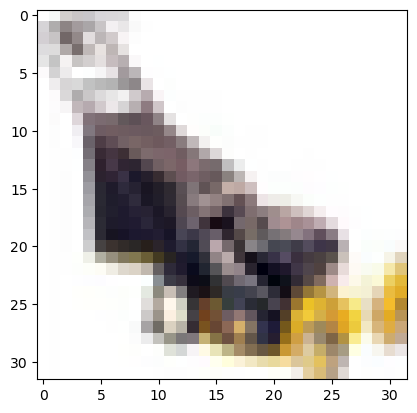

1/1 [==============================] - 0s 68ms/step
19
5
predicted label: household electrical devices
actual label: vehicles 2


In [73]:
#get an image from the test set
image_index = 32
image = tst_images[:,:,:,image_index]
print(image.shape)

#display the image, note the image type is float32
plt.imshow(image, cmap='gray')
plt.show()

#reshape the image to be in the correct format for the model
image = image.reshape(1, 32, 32, 3)

#make a prediction on the image
prediction = model.predict(image)

#print the actual label for the image
print(tst_labelscoarse[image_index])

#print the predicted label for the image
print(np.argmax(prediction))

#print the prediction names from the csv file
print('predicted label:',labelnamescoarse[np.argmax(prediction)])
print('actual label:',labelnamescoarse[tst_labelscoarse[image_index]])
